In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd

In [20]:
# Paths
images_dir = "../data/train/images"
labels_dir = "../data/train/labels"

# Class mapping
class_map = {
    0: 'dog',
    1: 'cat',
    2: 'cow',
    3: 'goat',
    4: 'boar',
    5: 'deer',
    6: 'leopard'
}

In [21]:
image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.jpg') or f.endswith('.png')])
label_files = sorted([f for f in os.listdir(labels_dir) if f.endswith('.txt')])

print(f'Total images: {len(image_files)}')
print(f'Total label files: {len(label_files)}')

Total images: 513
Total label files: 513


In [23]:
# Verify directory exists
if not os.path.exists(labels_dir):
    print(f"Error: Directory '{labels_dir}' does not exist")
    exit(1)

unique_classes = set()

# Iterate through all .txt files in labels directory
for label_file in os.listdir(labels_dir):
    if label_file.endswith('.txt'):
        file_path = os.path.join(labels_dir, label_file)
        
        try:
            with open(file_path, 'r') as f:
                for line in f:
                    # Skip empty lines
                    if not line.strip():
                        continue
                    
                    # Get first token (class value)
                    class_value = line.split()[0]
                    unique_classes.add(class_value)
                    
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")

# Print results
print("Unique class values found:")
for cls in sorted(unique_classes):
    print(f"- {cls}")

print(f"\nTotal unique classes: {len(unique_classes)}")

Unique class values found:
- 0
- 1
- 2
- 3
- 4
- 5
- 6
- boar
- cat
- cow
- deer
- dog
- goat
- leopard

Total unique classes: 14


Counter({2: 594, 5: 174, 3: 162, 4: 102, 0: 78, 1: 74, 6: 74})


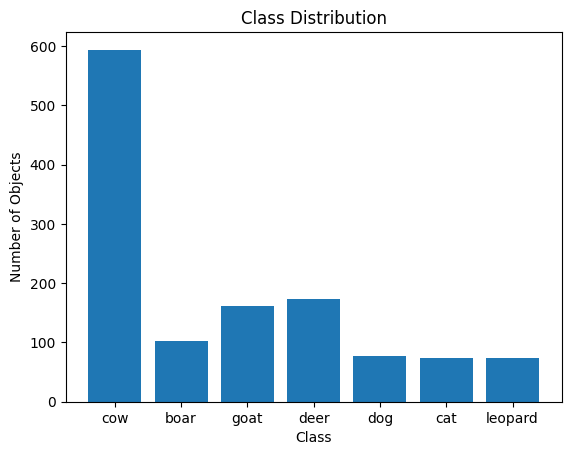

In [27]:
all_classes = []
for label_file in label_files:
    if label_file != "classes.txt":
        with open(os.path.join(labels_dir, label_file)) as f:
            for line in f:
                class_idx = int(line.split()[0])
                all_classes.append(class_idx)

class_counts = Counter(all_classes)

#print all object counts
for class_idx in sorted(class_counts):
    class_name = class_map.get(class_idx, str(class_idx))
    print(f"{class_name} - {class_counts[class_idx]}")

#plot object counts 
plt.bar([class_map[c] for c in class_counts.keys()], class_counts.values())
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Objects')
plt.show()